In [1]:
# import
import pandas as pd
from collections import OrderedDict
from operator import itemgetter    
import re
from bs4 import BeautifulSoup

import numpy as np
import json
import glob
import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from pprint import pprint

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis

# This one is hanged from .gensim to gensim_models
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
df = pd.read_csv(r'../QBT/Empirical.csv', sep=',')
print(df.shape)


(21138, 23)


In [3]:
# Removing the "code" and "a" tag first, we want to delete what is inside the tag aswell, remvoing "a href" links and code snippets.

new_list = []
list_body = df["Body"].to_list()
temp = list_body

#print(list_body[2])
#print("-----")

for x in range(len(temp)):
    soup = BeautifulSoup(temp[x])
    codetags = soup.find_all(['code', 'a'])
    for codetag in codetags:
        codetag.extract()
        
    #print(soup)
    #print(str(soup))
    
    new_list.append(str(soup))

#print(len(new_list))
#print(new_list[2])
#print(df["Body"][1])

print("-----")
df["Body_new"] = new_list

#print(df["Body_new"][2])
print(df.shape)

-----
(21138, 24)


In [4]:
# Removing chacter and tags from the dataframe

# Removing the remaning tags
df["Body_new"] = df.Body_new.apply(lambda x: re.sub('<[^<]+?>', '', x))

# Removing ''
df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\'', '', x))

# Removing ""
df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\"', '', x))

df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\.', ' ', x))

df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\,', ' ', x))

df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\!', ' ', x))

df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\?', ' ', x))

df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\\n', ' ', x))


print(df["Body_new"][1])

I have a node function that gets a link to YouTube video and sends a request to    Its a website that allows to download MP3 from YT  Then it parses the response HTML to get a direct download link from the document (using a library called cheerio  but if Youre not familiar with it  its just for scraping the link from HTML)  and afterwards opens the link to download the MP3  My code:  While working on my machine  this code works correctly  The console log gives a link which I can open on my browser and see that the mp3 is actually downloading  But when I run it on Lambda  the link I get has the correct format  but its simply not working  It redirects to some non-existing domain  Im not entirely sure how is this even possible  The only thing I might think about is that the website may think that the program is a bot (logically) and give a wrong link (which sounds pretty bizzare)  But I decided to also send some user-agent headers  It didnt work either  Im really confused about how can th

In [5]:
# Getting all posts with Empirical tags, this is beacuse our initial dataset contains posts with a "master"-tag of the set of tags

list_of_tages13 = ["<serverless>", "<faas>", "<serverless-framework>", "<aws-serverless>", "<openwhisk>", "<aws-lambda>", "<aws-sam>", "<aws-sam-cli>", 
"<serverless-architecture>", "<serverless-offline>", "<vercel>", "<serverless-plugins>", "<localstack>"]

What_we_want = df[df["Tags"].str.contains('|'.join(list_of_tages13))]
print(len(What_we_want))

df = What_we_want



20926


In [6]:
#  Code for creating dictonary that is counting the number of posts iwth the specific tag.
#What_we_want = What_we_want["Tags"].str.replace(r'<', '')
#What_we_want = What_we_want.str.replace(r'>', ' ')
#tags_list = What_we_want.tolist()

#list_of_tags = []
#for x in range(len(tags_list)):
#    list_of_tags.extend(tags_list[x].split())


#d = {i:list_of_tags.count(i) for i in list_of_tags}
#print(OrderedDict(sorted(d.items(), key = itemgetter(1), reverse = True)))

In [7]:
print(df.columns)
df["CommentCount"].mean()

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense', 'Body_new'],
      dtype='object')


1.5611201376278314

In [8]:
synonyms = [" cost"," pricing"," Fee "," Charge","Expensive", " Pay "," Payment"," bill " ," Cheap" ," Budget"]

count = 0
for word in synonyms:
    print("----" + str(word) + "----")
    print("Body count: " + str(len(df[df['Body_new'].str.contains(word, case=False)])))
    count= count + len(df[df['Body_new'].str.contains(word, case=False)])
print(count)

---- cost----
Body count: 277
---- pricing----
Body count: 30
---- Fee ----
Body count: 4
---- Charge----
Body count: 65
----Expensive----
Body count: 71
---- Pay ----
Body count: 44
---- Payment----
Body count: 33
---- bill ----
Body count: 15
---- Cheap----
Body count: 31
---- Budget----
Body count: 6
576


In [9]:
# filtering out the final dataset

#df_temp = pd.DataFrame()
columns = ["Body_new", "Body", "Id"]
df_filtered = df[df["Body_new"].str.contains('|'.join(synonyms), case=False)]
print(len(df_filtered))

# Exporting the final data set for analysis
print(len(df_filtered))
columns = ["Id", "Body_new"]
df_export = df_filtered[columns]
df_export = df_export.sample(frac=1).reset_index(drop=True)
#df_export.to_csv(r'../final_dataset_0429.csv', sep= ",", index = False)




499
499


In [18]:
print(df_filtered.columns)
columns = ["Body_new", "Body", "Id", "AnswerCount", "ViewCount", "AcceptedAnswerId", "CreationDate"]
df_filtered[columns].head()

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense', 'Body_new'],
      dtype='object')


,Body_new,Body,Id,AnswerCount,ViewCount,AcceptedAnswerId,CreationDate
7,I am integrating a payment solution which uses...,<p>I am integrating a payment solution which u...,54114957,1,881,NaN,2019-01-09 16:55:31
42,I am using API Gateway to build a patch method...,<p>I am using API Gateway to build a patch met...,36036500,1,627,36161069.0,2016-03-16 13:02:51
63,I have an AWS Lambda function which triggers h...,<p>I have an AWS Lambda function which trigger...,54287228,1,696,NaN,2019-01-21 09:47:52
104,My current Situation: I currently have a Pytho...,<p><strong>My current Situation:</strong></p>\...,36298053,3,634,36300028.0,2016-03-30 01:28:16
123,i am new to aws serverless and trying to host...,"<p>i am new to aws serverless, and trying to h...",54473954,1,246,NaN,2019-02-01 06:21:53


In [363]:
pd.set_option('display.max_colwidth', None)
for word in synonyms:
    print("----" + word + "----")    
    temp = df[df['Body_new'].str.contains(word, case=False)]
    
    size = len(temp)
    
    if size <= 30:
        print(temp["Body_new"].sample(frac = 1))
    elif size > 30 and size <= 100:
        print(temp["Body_new"].sample(frac = 0.4))
    elif size > 100 and size <= 300:
        print(temp["Body_new"].sample(frac = 0.1))
    elif size > 300 and size <= 1000:
        print(temp["Body_new"].sample(frac = 0.05))
    else:
        print(temp["Body_new"].sample(frac = 0.02))


    
    


---- cost----
4009                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

14828                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

6878     I need to create something on Azure that can process incoming streams of messages for a set of entities. We will have anywhere between 20 and 2,000 entities at any point in time; these get created and discarded dynamically. Messages will be generated using our on-premises system, and sent to Azure using some queueing mechanism. Each message will be associated with a specific entity through an  property. Messages belonging to the same entity must be processed in-order with respect to each other. \nAt the same time, the solution must be scalable with respect to entities. If I have steady streams of messages for 1,000 entities, I'd want to have 1,000 concurrent executions of my logic. If an entity takes a long time to process one of its messages, this must not block any of the other entities from processing their messages. Each message may take anywhere from 100ms to 10s to process (vast majority below 1s), and each entity would receive an average of one message per second.\nDisa

10051                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

15657                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [364]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["use", "would", "way", "need", "know", "want", "file", "string", "see"])

In [365]:
# Convert to list
data = df.Body_new.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\"", "", sent) for sent in data]

# Remove distracting (
data = [re.sub("\(", "", sent) for sent in data]

# Remove distracting )
data = [re.sub("\)", "", sent) for sent in data]

pprint(data[:1])


['I want to Reset DynamoDB Table Write and read throughput after my build '
 'creates the table using AWS Lambda Function. I need to provision 200 RCU and '
 '600 WCU during an intial run to write my data to the table. Once written, my '
 'table does not require more than 50 WCU and 20 RCU. I currently reset the '
 'value in dynamoDB console once the table is created. Developers use circle '
 'CI which uses the environment variables for provision RCU/WCU and trigger '
 'the build that creates the lambda functions and dynamoDB. AS an admin, I '
 'dont have access to the code repo but basically, it creates required tables '
 'via Circle CI build triggers using the source code via GitHub Repo. I was '
 'asked to automate the problem described above. We would like to write a new '
 'lambda function triggered once successful creation of DyanamoTable during '
 'the initial run. This new function should reset the table throughput value '
 'to 50WCU and 20 RCU without relying on Dynamo Autosca

In [366]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['want', 'to', 'reset', 'dynamodb', 'table', 'write', 'and', 'read', 'throughput', 'after', 'my', 'build', 'creates', 'the', 'table', 'using', 'aws', 'lambda', 'function', 'need', 'to', 'provision', 'rcu', 'and', 'wcu', 'during', 'an', 'intial', 'run', 'to', 'write', 'my', 'data', 'to', 'the', 'table', 'once', 'written', 'my', 'table', 'does', 'not', 'require', 'more', 'than', 'wcu', 'and', 'rcu', 'currently', 'reset', 'the', 'value', 'in', 'dynamodb', 'console', 'once', 'the', 'table', 'is', 'created', 'developers', 'use', 'circle', 'ci', 'which', 'uses', 'the', 'environment', 'variables', 'for', 'provision', 'rcu', 'wcu', 'and', 'trigger', 'the', 'build', 'that', 'creates', 'the', 'lambda', 'functions', 'and', 'dynamodb', 'as', 'an', 'admin', 'dont', 'have', 'access', 'to', 'the', 'code', 'repo', 'but', 'basically', 'it', 'creates', 'required', 'tables', 'via', 'circle', 'ci', 'build', 'triggers', 'using', 'the', 'source', 'code', 'via', 'github', 'repo', 'was', 'asked', 'to', 'auto

In [367]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['want', 'to', 'reset', 'dynamodb', 'table', 'write', 'and', 'read', 'throughput', 'after', 'my', 'build', 'creates', 'the', 'table', 'using', 'aws', 'lambda', 'function', 'need', 'to', 'provision', 'rcu', 'and', 'wcu', 'during', 'an', 'intial', 'run', 'to', 'write', 'my', 'data', 'to', 'the', 'table', 'once', 'written', 'my', 'table', 'does', 'not', 'require', 'more_than', 'wcu', 'and', 'rcu', 'currently', 'reset', 'the', 'value', 'in', 'dynamodb', 'console', 'once', 'the', 'table', 'is', 'created', 'developers', 'use', 'circle', 'ci', 'which', 'uses', 'the', 'environment_variables', 'for', 'provision', 'rcu_wcu', 'and', 'trigger', 'the', 'build', 'that', 'creates', 'the', 'lambda', 'functions', 'and', 'dynamodb', 'as', 'an', 'admin', 'dont', 'have', 'access', 'to', 'the', 'code', 'repo', 'but', 'basically', 'it', 'creates', 'required', 'tables', 'via', 'circle', 'ci', 'build', 'triggers', 'using', 'the', 'source', 'code', 'via', 'github_repo', 'was', 'asked', 'to', 'automate', 'the',

In [368]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [369]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['reset', 'dynamodb', 'table', 'write', 'read', 'throughput', 'build', 'create', 'table', 'use', 'function', 'provision', 'intial', 'run', 'write', 'datum', 'table', 'write', 'table', 'currently', 'reset', 'value', 'dynamodb', 'console', 'table', 'create', 'developer', 'use', 'provision', 'build', 'create', 'lambda', 'function', 'access', 'code', 'basically', 'create', 'require', 'table', 'build', 'trigger', 'use', 'source', 'code', 'ask', 'automate', 'problem', 'describe', 'write', 'new', 'lambda', 'function', 'trigger', 'successful', 'creation', 'dyanamotable', 'initial', 'run', 'new', 'function', 'reset', 'table', 'throughput', 'value', 'wcu', 'rely', 'autoscale', 'research', 'many', 'place', 'go', 'aws', 'documentation', 'could', 'find', 'detail', 'function', 'make', 'sense']]


In [370]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 2), (8, 1), (9, 1), (10, 4), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 5), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 2), (38, 1), (39, 1), (40, 1), (41, 7), (42, 2), (43, 2), (44, 3), (45, 2), (46, 1), (47, 4)]]


In [371]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('access', 1),
  ('ask', 1),
  ('automate', 1),
  ('autoscale', 1),
  ('aws', 1),
  ('basically', 1),
  ('build', 3),
  ('code', 2),
  ('console', 1),
  ('could', 1),
  ('create', 4),
  ('creation', 1),
  ('currently', 1),
  ('datum', 1),
  ('describe', 1),
  ('detail', 1),
  ('developer', 1),
  ('documentation', 1),
  ('dyanamotable', 1),
  ('dynamodb', 2),
  ('find', 1),
  ('function', 5),
  ('go', 1),
  ('initial', 1),
  ('intial', 1),
  ('lambda', 2),
  ('make', 1),
  ('many', 1),
  ('new', 2),
  ('place', 1),
  ('problem', 1),
  ('provision', 2),
  ('read', 1),
  ('rely', 1),
  ('require', 1),
  ('research', 1),
  ('reset', 3),
  ('run', 2),
  ('sense', 1),
  ('source', 1),
  ('successful', 1),
  ('table', 7),
  ('throughput', 2),
  ('trigger', 2),
  ('use', 3),
  ('value', 2),
  ('wcu', 1),
  ('write', 4)]]

In [382]:
# Remove common and non-common words???

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [383]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.055*"call" + 0.042*"request" + 0.041*"time" + 0.028*"update" + '
  '0.028*"response" + 0.022*"log" + 0.022*"user" + 0.019*"app" + 0.016*"case" '
  '+ 0.014*"http"'),
 (1,
  '0.050*"api" + 0.044*"set" + 0.032*"datum" + 0.031*"return" + 0.028*"invoke" '
  '+ 0.025*"key" + 0.024*"client" + 0.024*"different" + 0.023*"endpoint" + '
  '0.023*"pass"'),
 (2,
  '0.118*"error" + 0.106*"create" + 0.046*"access" + 0.042*"serverless" + '
  '0.040*"add" + 0.031*"bucket" + 0.030*"help" + 0.027*"new" + 0.027*"change" '
  '+ 0.023*"role"'),
 (3,
  '0.071*"use" + 0.048*"try" + 0.038*"be" + 0.038*"work" + 0.037*"get" + '
  '0.032*"code" + 0.030*"run" + 0.023*"follow" + 0.017*"find" + '
  '0.015*"problem"'),
 (4,
  '0.044*"instance" + 0.038*"message" + 0.037*"deploy" + 0.036*"send" + '
  '0.029*"application" + 0.026*"file" + 0.026*"service" + 0.021*"email" + '
  '0.018*"process" + 0.016*"question"'),
 (5,
  '0.149*"function" + 0.134*"lambda" + 0.024*"trigger" + 0.023*"event" + '
  '0.022*"howeve

In [384]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.98148345355771

Coherence Score:  0.4097080105898001


In [385]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\Eric\.conda\envs\BTenv\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.283928  0.037867       1        1  30.829351
5     -0.071286 -0.378374       2        1  19.276581
0      0.199203 -0.071299       3        1  14.143885
4     -0.013841  0.232943       4        1  12.970137
1     -0.124727  0.122782       5        1  11.588790
2      0.294578  0.056080       6        1  11.191256, topic_info=          Term          Freq         Total Category  logprob  loglift
21    function  24135.000000  24135.000000  Default  30.0000  30.0000
25      lambda  21787.000000  21787.000000  Default  29.0000  29.0000
157      error  11107.000000  11107.000000  Default  28.0000  28.0000
10      create  10008.000000  10008.000000  Default  27.0000  27.0000
44         use  18430.000000  18430.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
174    default    725.902514    726.801414   Topic6  -4.8673   2.1888
1164       tag    711.444907    712.340920   Topic6  -4.8874   2.1888
374   manually    686.324847    687.225148   Topic6  -4.9234   2.1887
181       help   2821.682198   3634.566521   Topic6  -3.5096   1.9369
393    already   1077.505017   1266.968833   Topic6  -4.4723   2.0281

[224 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
245       2  0.927390     able
245       5  0.072279     able
0         6  0.999845   access
259       6  0.999524  account
192       3  0.999093  achieve
...     ...       ...      ...
5187      3  0.999101   vercel
153       5  0.999416      web
99        1  0.999924     work
47        2  0.999554    write
295       4  0.999330      zip

[206 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 1, 5, 2, 3])

In [397]:
perplexity = []
coherence = []
lda_models = []
K = []
for i in range(18):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i+3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    
    K.append(i+3)
    # Compute Perplexity
    print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
    perplexity.append(lda_model.log_perplexity(corpus))
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
    coherence.append(coherence_lda)





Perplexity:  -6.737826927967802

Coherence Score:  0.4914510116999171

Perplexity:  -6.749946653072546

Coherence Score:  0.4572893475786981

Perplexity:  -6.776475267688364

Coherence Score:  0.45046961541538977

Perplexity:  -6.787073353553193

Coherence Score:  0.4388693327531659

Perplexity:  -6.820460840211071

Coherence Score:  0.46318848678323726

Perplexity:  -6.8589962336672405

Coherence Score:  0.4142998824904054

Perplexity:  -6.921862728649725

Coherence Score:  0.39095476622403813

Perplexity:  -7.0236225208857315

Coherence Score:  0.3836305086338234

Perplexity:  -7.198989272704773

Coherence Score:  0.3740977171054427

Perplexity:  -7.495191991077189

Coherence Score:  0.39432504481077063

Perplexity:  -7.940516441541992

Coherence Score:  0.3736215745290878

Perplexity:  -8.623311657811316

Coherence Score:  0.3468435258134573

Perplexity:  -9.186268326336661

Coherence Score:  0.37440668268416477

Perplexity:  -9.493112974289106

Coherence Score:  0.3452862515911239

In [398]:
print(perplexity)
print("-------")
print(coherence)

[-6.7378269337325225, -6.749946653284513, -6.776475268070656, -6.787073349631649, -6.820460821734528, -6.858996286596811, -6.921862722745243, -7.023622510868383, -7.19898927557772, -7.4951919818272525, -7.940516439918707, -8.623311644770423, -9.186268328528472, -9.493112977099711, -9.683544126378864, -9.850247966869773, -10.01276651992393, -10.17480232039164]
-------
[0.4914510116999171, 0.4572893475786981, 0.45046961541538977, 0.4388693327531659, 0.46318848678323726, 0.4142998824904054, 0.39095476622403813, 0.3836305086338234, 0.3740977171054427, 0.39432504481077063, 0.3736215745290878, 0.3468435258134573, 0.37440668268416477, 0.3452862515911239, 0.3318195921570244, 0.3298906866234729, 0.3495593893757375, 0.34138935019890326]


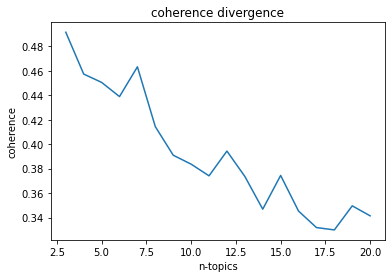

In [399]:
import matplotlib.pyplot as plt

  
plt.plot(K, coherence)
plt.title('coherence divergence')
plt.xlabel('n-topics')
plt.ylabel('coherence')
plt.show()